# LCS Demo 1

**LCS Workshop- Educational LCS - eLCS**

Outcome: *Learn the concept and use of Learning Classifier Systems *(*LCSs*)

Instructors: [Dr Ryan Urbanowicz](http://www.ryanurbanowicz.com/), [Dr Will Browne](http://ecs.victoria.ac.nz/Main/WillBrowne) And [Dr Karthik Kuber](http://kkuber.mysite.syr.edu/),

The following topics will be covered in a series of hands-on exercises and demonstrations:
1. LCS in a Nutshell 
2. LCS Concepts 
3. LCS Functional Cycle 
4. LCS Adaptability 
5. LCS Applications (toy and real problems) 

<p style="color:red;">Welcome to the Educational Learning Classifier System (eLCS).</p> 
It has the core elements of the functionality that help define the concept of LCSs. It’s the same family as the fully featured ExSTraCS system, so it is easy to transfer to a state-of-the-art LCS from this shallow learning curve.

eLCS complements the forthcoming *Textbook on Learning Classifier Systems*. Each demo is paired with one of the chapters in the textbook. Therefore, there are 5 different versions of an educational learning classiﬁer system (eLCS), as relevant functionality (code) is added to eLCS at each stage. This builds up the eLCS algorithm in its entirety from Demo 1 through to 5. Demo 6 showcases how ExSTraCS may be applied to a real-world data mining example, i.e. large scale bioinformatics. 

- **Demo 1 Understanding of what an LCS is attempting – how does it classify the training data?**
- Demo 2 Matching and Covering
- Demo 3 Prediction, Rule Population Evaluations, GA Rule Discovery and Parental Selection
- Demo 4 Deletion and Niche GA + Subsumption
- Demo 5 Complete eLCS applied to a complex (toy) problem
- Bonus Demo 6 ExSTraCS applied to a real-world data mining example 

All code is in Python. This newest version is coded in Python 3.4. Here it is to be run in the Jupyter platform (http://jupyter.org/), as it supports interactive data science.

Each demo version only includes the minimum code needed to perform the functions they were designed for. This way users can start by examining the simplest version of the code and progress onwards. The demo exercises are to implement several functions in eLCS and view results in spreadsheet, text ﬁle or Python based graphics (preferable).

## Set-up and introduction to Jupyter

Please see http://jupyter.org/ on how to set-up Jupyter with Python 3.
Please download eLCS_1.ipynb, … , eLCS_5.ipynb from Github 

### 1. Jupyter can be extended to hide individual code in cells
*All* of the necessary code is below, separated into 'cells' for descriptive purposes. It is verbose and can make it difficult to see important method-code compared with infrastructure-code, so it is nice to be able to hide code on occasion. Jupyter needs the hide_code extension available from: https://github.com/kirbs-/hide_code
It can be downloaded and extracted into the Pythod directory.
"pip install hide_code" from the command prompt then installs the extension. Note a reboot of the server is needed! 
Then under the drop down menu of 'Cell Toolbar' is possible to toggel 'Hide Code', for your viewing pleasure.

 - Name:        eLCS_Run.py
 - Authors:     Ryan Urbanowicz - Written at Dartmouth College, Hanover, NH, USA
 - Contact:     ryan.j.urbanowicz@darmouth.edu
 - Created:     November 1, 2013
 - Description: To run e-LCS, run this module.  A properly formatted configuration file, including all run parameters must be included with the path to that file given below.  In this example, the configuration file has been included locally, so only the file name is required.
             
--------------------------------------------------------------------------------------------------------------------------------
eLCS: Educational Learning Classifier System - A basic LCS coded for educational purposes.  This LCS algorithm uses supervised learning, and thus is most 
similar to "UCS", an LCS algorithm published by Ester Bernado-Mansilla and Josep Garrell-Guiu (2003) which in turn is based heavily on "XCS", an LCS 
algorithm published by Stewart Wilson (1995).  

Copyright (C) 2013 Ryan Urbanowicz 
This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the 
Free Software Foundation; either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABLILITY 
or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, 
Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA


The purpose of an LCS is to classify, which it does through a population rules. We have included, as a rule population example, a real run of the complete (Demo 5) eLCS after 10000 iterations (eLCS has learned the problem already with perfect accuracy) (see ExampleRun eLCS 10000 RulePop.txt).

We have removed some of the rule parameters columns to keep this example as simple as possible. Users can see below to examine rules, or can are encouraged to open the rule population in Excel, try sorting rules by numerosity, accuracy, or initial time stamp and examine basic rule properties. Instead of manually selecting a small set of rules to include as an example rule population for this ﬁrst Demo, it is good to be initially exposed to what a complete rule population might look like. 

Conditions in the rules included (A 0, A 1, R 0, R 1,R 2, and R 3), making up the multiplexer problem address (A) and register (R) bits. Class is labelled as Phenotype, since eLCS handles both discrete and continuous endpoints, which are better generalized as a phenotype. Also included in the ﬁle are the following rule parameters: ﬁtness, accuracy, numerosity, TimeStamp, Initial TimeStamp, and Speciﬁcity (just the fraction of speciﬁed attributes in a given rule). The rule population is initial ordered by initial Time Stamp, i.e., the iteration in which the rule was originally introduced to the population. 

Load in existing file rule population

In [1]:
import numpy as np
import matplotlib.pyplot as plt

headerList = np.array([])
dataList = []
arraylist = np.array([])
# Open the file for reading.
with open('ExampleRun_eLCS_10000_RulePop.txt', 'r') as infile:
    headerList = infile.readline().rstrip('\n').split('\t')   #strip off first row
    for line in infile:
        lineList = line.strip('\n').split('\t')
        # arraylist = [float(i) for i in lineList]
        dataList.append(lineList)
    infile.close()  


#my_list = data.strip('\n').split('\t')
#print(headerList)
#print(dataList)
#print(np.shape(dataList))

Display final population:

In [2]:
import pandas
import numpy
from IPython.display import display

indexR = ['Rule'+str(i) for i in range(1, len(dataList)+1)]

df = pandas.DataFrame(dataList, index=indexR,columns=headerList)
display(df)

,A_0,A_1,R_0,R_1,R_2,R_3,Phenotype,Fitness,Accuracy,Numerosity,AveMatchSetSize,TimeStampGA,InitTimeStamp,Specificity,DeletionProb,CorrectCount,MatchCount
Rule1,1,#,#,#,#,1,0,0.0009863712048789912,0.250500200080032,4,0,9988,0,0.3333333333333333,0,626,2499
Rule2,1,0,#,1,1,1,1,1.0,1.0,54,0,9985,1,0.8333333333333334,0,313,313
Rule3,1,#,1,#,#,1,0,0.0009765625,0.25,2,0,9984,1,0.5,0,312,1248
Rule4,#,0,#,#,1,1,0,0.0009883471081012364,0.25060048038430743,1,0,9986,2,0.5,0,313,1249
Rule5,1,0,#,1,1,#,1,1.0,1.0,24,0,9998,2,0.6666666666666666,0,625,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rule1322,#,0,0,0,#,#,1,0.0007651622719418543,0.23809523809523808,1,0,9971,9672,0.5,0,10,42
Rule1323,#,#,#,1,#,0,1,0.03558402524936908,0.5131578947368421,1,0,9998,9702,0.3333333333333333,0,39,76
Rule1324,0,#,1,1,#,0,0,0.0,0.0,1,0,9788,9788,0.6666666666666666,0,0,14
Rule1325,#,#,0,#,1,0,1,0.007415771484375,0.375,1,0,9974,9853,0.5,0,6,16


Visualise classifiers

['1', '0', '#', '1', '1', '1', '1', '1.0', '1.0', '54', '0', '9985', '1', '0.8333333333333334', '0', '313', '313']
[1, 0, 2, 1, 1, 1, 1, '1.0', '1.0', '54', 0, '9985', 1, '0.8333333333333334', 0, '313', '313']
[[1 0 2 1 1 1]]
[[1]]


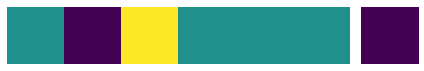

['1', '#', '1', '#', '#', '1', '0', '0.0009765625', '0.25', '2', '0', '9984', '1', '0.5', '0', '312', '1248']
[1, 2, 1, 2, 2, 1, 0, '0.0009765625', '0.25', '2', 0, '9984', 1, '0.5', 0, '312', '1248']
[[1 2 1 2 2 1]]
[[0]]


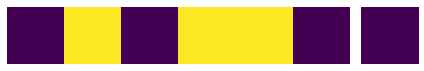

['#', '0', '#', '#', '1', '1', '0', '0.0009883471081012364', '0.25060048038430743', '1', '0', '9986', '2', '0.5', '0', '313', '1249']
[2, 0, 2, 2, 1, 1, 0, '0.0009883471081012364', '0.25060048038430743', 1, 0, '9986', '2', '0.5', 0, '313', '1249']
[[2 0 2 2 1 1]]
[[0]]


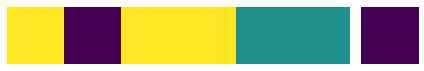

['1', '0', '#', '1', '1', '#', '1', '1.0', '1.0', '24', '0', '9998', '2', '0.6666666666666666', '0', '625', '625']
[1, 0, 2, 1, 1, 2, 1, '1.0', '1.0', '24', 0, '9998', '2', '0.6666666666666666', 0, '625', '625']
[[1 0 2 1 1 2]]
[[1]]


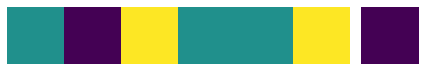

In [3]:
import numpy as np
import matplotlib.pyplot as p
from matplotlib import gridspec

for j in range(1, 5): #len(dataList)+1):
    dL = dataList[j] #0 is indice of first row of data, 1 is second so can loop!
    print(dL)
    for i in range(0,len(dL)-1):
        if (dL[i] =='0'): dL[i] = 0
        if (dL[i] =='1'): dL[i] = 1
        if (dL[i] =='#'): dL[i] = 2
        
    print(dL)
    c = np.array([[dL[0],dL[1],dL[2],dL[3],dL[4],dL[5]]])
    a = np.array([[dL[6]]])

    gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1]) 
    print(c)
    print(a)
    p.subplot(gs[0])
    p.imshow(c, interpolation="nearest")
    p.axis('off')

    p.subplot(gs[1])
    p.imshow(a)
    p.axis('off')

    p.tight_layout()
    p.show()